In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data = pd.read_csv('student-por.csv')
data.shape

(649, 33)

## Cleaning Data

In [3]:
## Droping unrequired columns
data.drop(['school', 'age', 'Pstatus'], axis=1, inplace=True)

## Droping null data
data.dropna(inplace=True)

## Visualizing Data

### First we visualize the correlation between the columns, we can see that there is high correlation between 'G1' and 'G2' with our target colum 'G3'. The rest of the columns also have some correlation with 'G3' hence we can train an SVM to make predictions on this data 

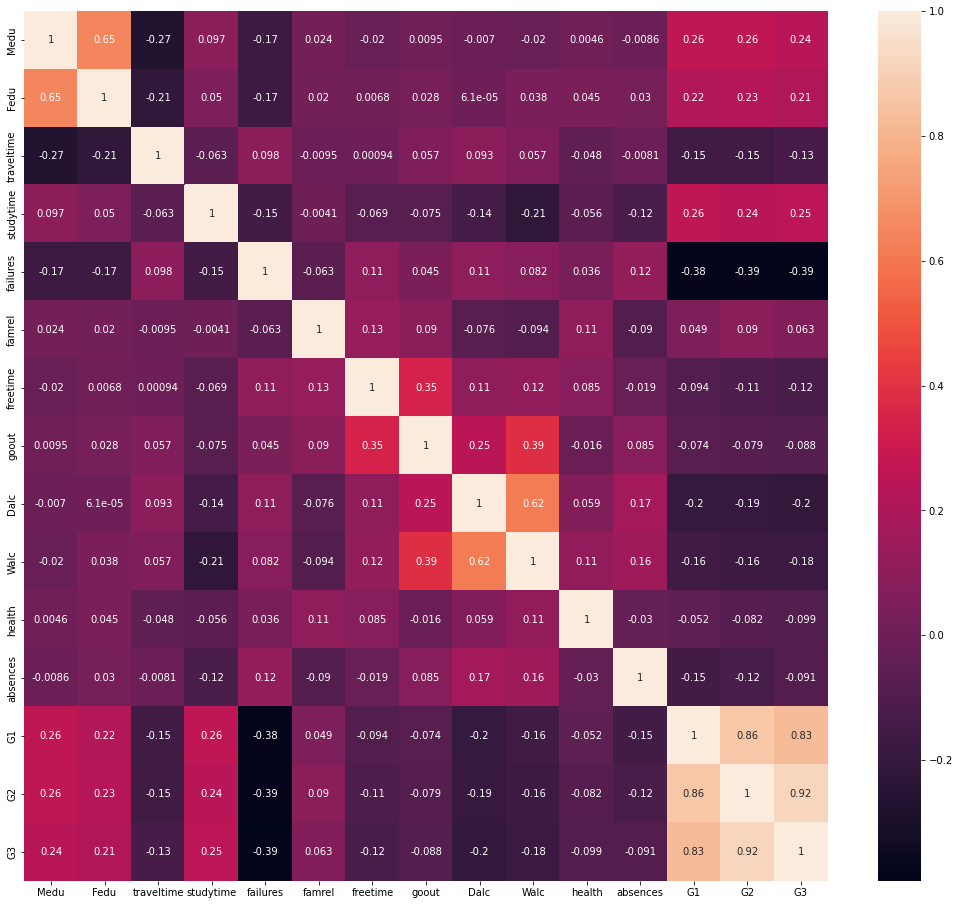

In [4]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True)

### Now we visualize the 'G3' column, below is a bar chart of showing how many students have acheived a certain grade. We can see that majority of the students lie between 7 to 18.

### We will create 3 classes 'L', 'M' and 'H'
<ul>
    <li>L will be for grades 0 to 5</li>
    <li>M will be for grades 6 to 15</li>
    <li>H will be for grades 16 to 20</li>
</ul>

In [5]:
final_grades = Counter(data['G3'].values)
for i in range(0, 21):
    if i not in final_grades.keys():
        final_grades[i] = 0

<BarContainer object of 21 artists>

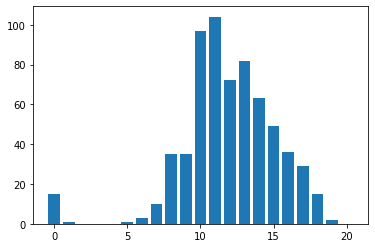

In [6]:
plt.bar(final_grades.keys(), final_grades.values())

### Gender distribution in data

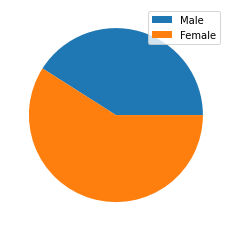

In [7]:
plt.pie([data[data['sex']=='M'].shape[0], data[data['sex']=='F'].shape[0]])
plt.legend(('Male', 'Female'))

## Preprocessing Data

In [8]:
data.dtypes


sex           object
address       object
famsize       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### We can see some of the solumn have 'object' as their data type, we need to convert them all to 'int' so we can use them for machine learning

In [9]:
yes_no_map = {'yes': 1, 'no': 0}
sex_map = {'F': 1, 'M': 0}
parent_job_map = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
reason_map = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
guardian_map = {'mother': 0, 'father': 1, 'other': 2}
address_map = {'R': 0, 'U': 1}
family_size_map = {'LE3': 0, 'GT3': 1}

In [10]:
data['schoolsup'] = data['schoolsup'].map(yes_no_map)
data['famsup'] = data['famsup'].map(yes_no_map)
data['paid'] = data['paid'].map(yes_no_map)
data['activities'] = data['activities'].map(yes_no_map)
data['nursery'] = data['nursery'].map(yes_no_map)
data['higher'] = data['higher'].map(yes_no_map)
data['internet'] = data['internet'].map(yes_no_map)
data['romantic'] = data['romantic'].map(yes_no_map)

data['sex'] = data['sex'].map(sex_map)

data['Mjob'] = data['Mjob'].map(parent_job_map)
data['Fjob'] = data['Fjob'].map(parent_job_map)

data['reason']=data['reason'].map(reason_map)
data['guardian']=data['guardian'].map(guardian_map)
data['address']=data['address'].map(address_map)
data['famsize']=data['famsize'].map(family_size_map)

In [11]:
data.dtypes

sex           int64
address       int64
famsize       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

### We can see that now all the columns are of 'int' data type

## Now we will move on to create the train and test set 

In [12]:
def grades_to_class(x):

    if x <= 5: return 'L'
    elif 6 <= x <= 15: return 'M'
    else: return 'H'


In [13]:
data['G3'] = data['G3'].apply(grades_to_class)

In [14]:
shuffled_data = shuffle(data, random_state=42)

In [15]:
y = shuffled_data['G3']
X = shuffled_data.drop('G3', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=33)

In [17]:
y_test.unique()

array(['M', 'H', 'L'], dtype=object)

## Training the SVM Classifier

In [18]:
svm_model = SVC(C=1, kernel='rbf', gamma='auto', random_state=11)

In [19]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', random_state=11)

## Evaluatinig the Model the Model

## Training Accuracy

In [20]:
training_accuracy = svm_model.score(X_train, y_train)

print(f'Training Accuracy: {training_accuracy*100:.2f}%')

Training Accuracy: 97.95%


In [21]:
X_train_pred = svm_model.predict(X_train)
training_cm = confusion_matrix(y_train, X_train_pred)

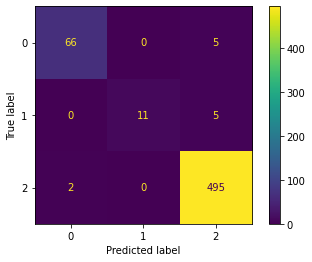

In [22]:
cm_display = ConfusionMatrixDisplay(training_cm)
cm_display.plot()

## Test Accuracy

In [23]:
test_accuracy = svm_model.score(X_test, y_test)

print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 90.77%


In [24]:
X_test_pred = svm_model.predict(X_test)
test_cm = confusion_matrix(y_test, X_test_pred)

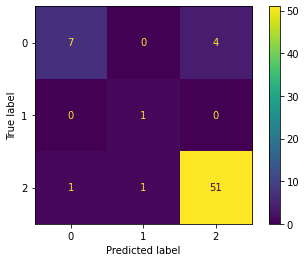

In [25]:
cm_display = ConfusionMatrixDisplay(test_cm)
cm_display.plot()

# Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.math import argmax
from tensorflow import random
from tensorflow import one_hot

random.set_seed(42)

### Preparing Data for Neural Network

In [28]:
g3_map = {'L': 0, 'M': 1, 'H': 2}

y_train_nn = one_hot(y_train.map(g3_map), 3)
y_test_nn = one_hot(y_test.map(g3_map), 3)

### Defining Model Architecture

In [29]:
model = Sequential([
    Dense(29, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')    
])

### Defining Model Hyperparameters

In [30]:
learning_rate = 0.01
loss_fn = 'categorical_crossentropy'
optimizer = Adam(lr=learning_rate)

In [31]:
model.compile(optimizer, loss=loss_fn, metrics=['accuracy'])

In [32]:
# model.summary()

### Training the Model

In [33]:
model.fit(X_train, y_train_nn, epochs=20)

Epoch 1/20
19/19 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.7997
Epoch 2/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8425
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8510
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8647
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8630
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8630
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8801
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8836
Epoch 9/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9110
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8921
Epoch 11/20
19/19 [

### We can see that the model's training accuracy is 91.44%:

In [34]:
model.save('student_performance_model.h5')


## Evaluating the model

---



In [35]:
test_accuracy = model.evaluate(X_test, y_test_nn)[1]

print(f'Test Accuracy: {test_accuracy*100:.2f}%')

3/3 [==============================] - 0s 4ms/step - loss: 0.1995 - accuracy: 0.8769
Test Accuracy: 87.69%


In [36]:
X_test_pred = np.argmax(model.predict(X_test), axis=1)
nn_test_cm = confusion_matrix(y_test.map(g3_map), X_test_pred)

3/3 [==============================] - 0s 4ms/step


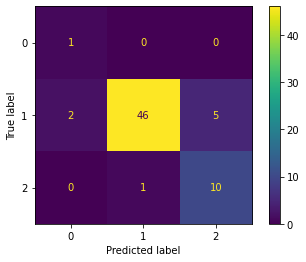

In [37]:
nn_test_cm_display = ConfusionMatrixDisplay(nn_test_cm)
nn_test_cm_display.plot()